In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


In [2]:
data = pd.read_csv("/content/Customer-Data.csv")
df=pd.DataFrame(data)

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.drop("CUST_ID", axis=1, inplace=True)

In [5]:
df.shape

(8950, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
df.describe(include='all')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].nunique()

CASH_ADVANCE_TRX     65
PURCHASES_TRX       173
TENURE                7
dtype: int64

In [11]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df2=df[df['MINIMUM_PAYMENTS'].isnull() == True]

In [13]:
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


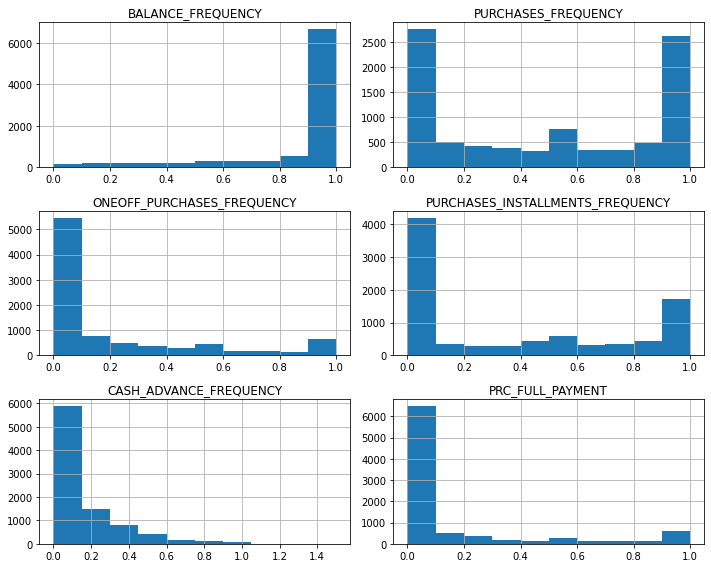

In [14]:
#Frequency variables in charts

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

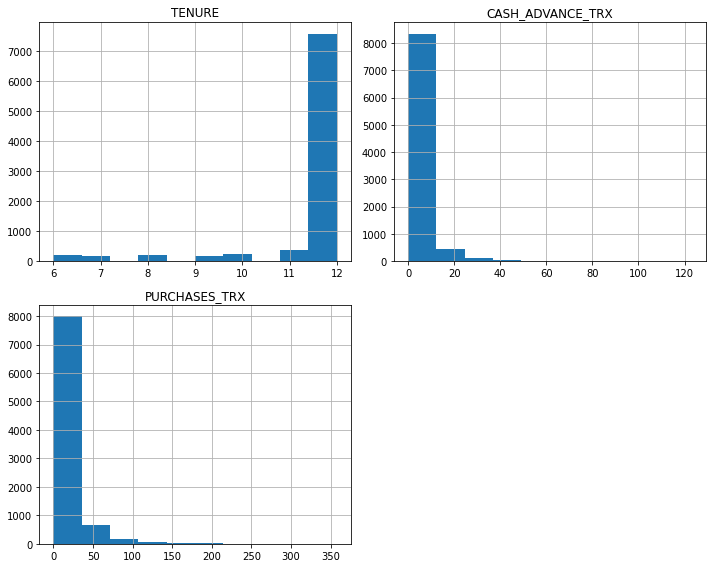

In [15]:
#int. values in histogram

df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

Text(0, 0.5, 'BALANCE')

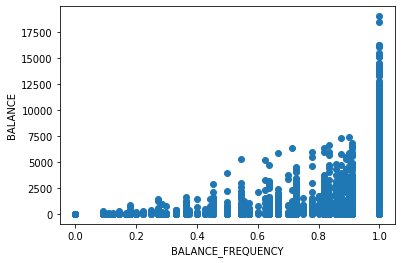

In [16]:
plt.scatter(df['BALANCE_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

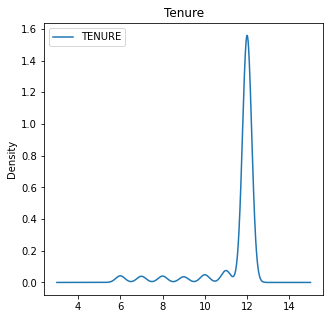

In [17]:
df[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')


In [18]:
columns=df.columns
columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

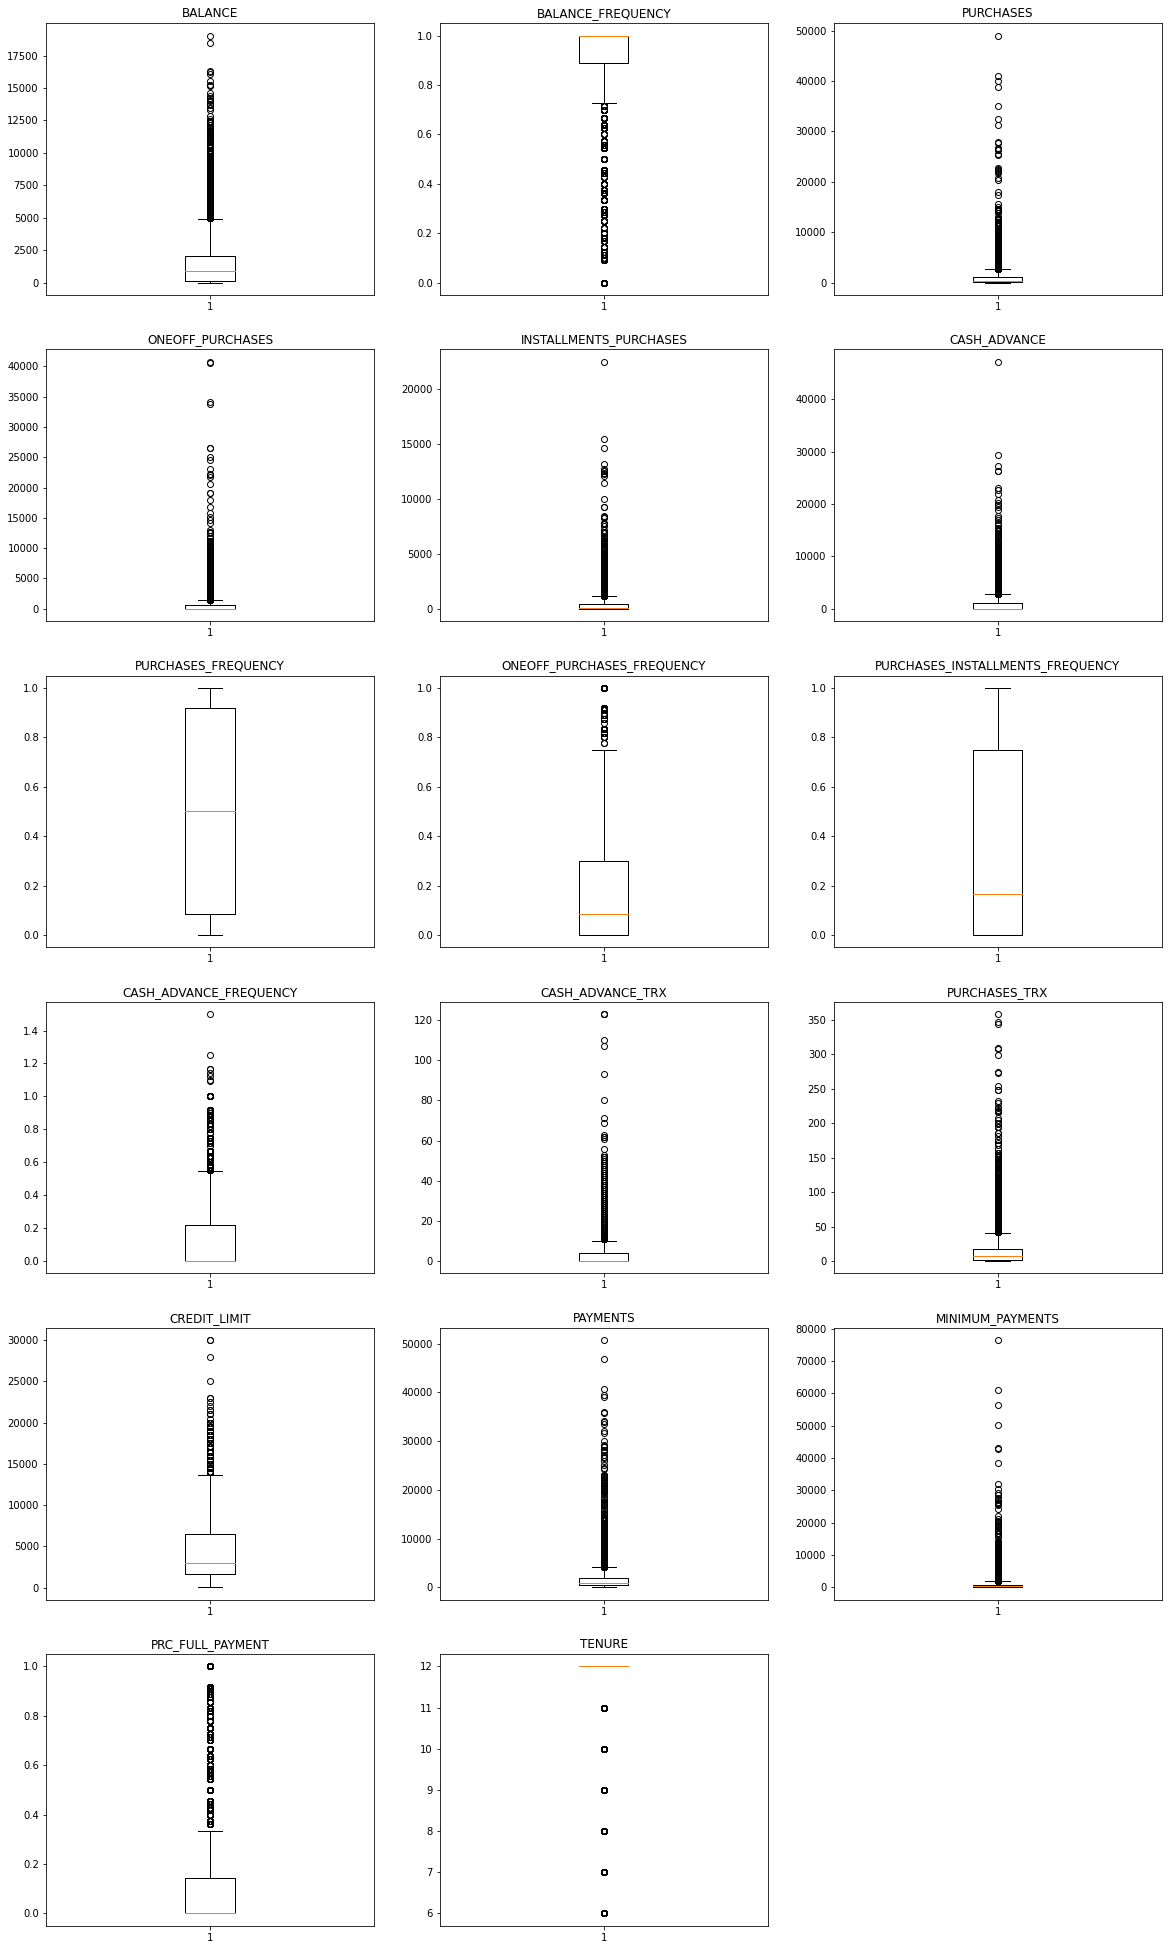

In [19]:
###  Outliers
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[columns[i]].dropna())
    plt.title(columns[i])

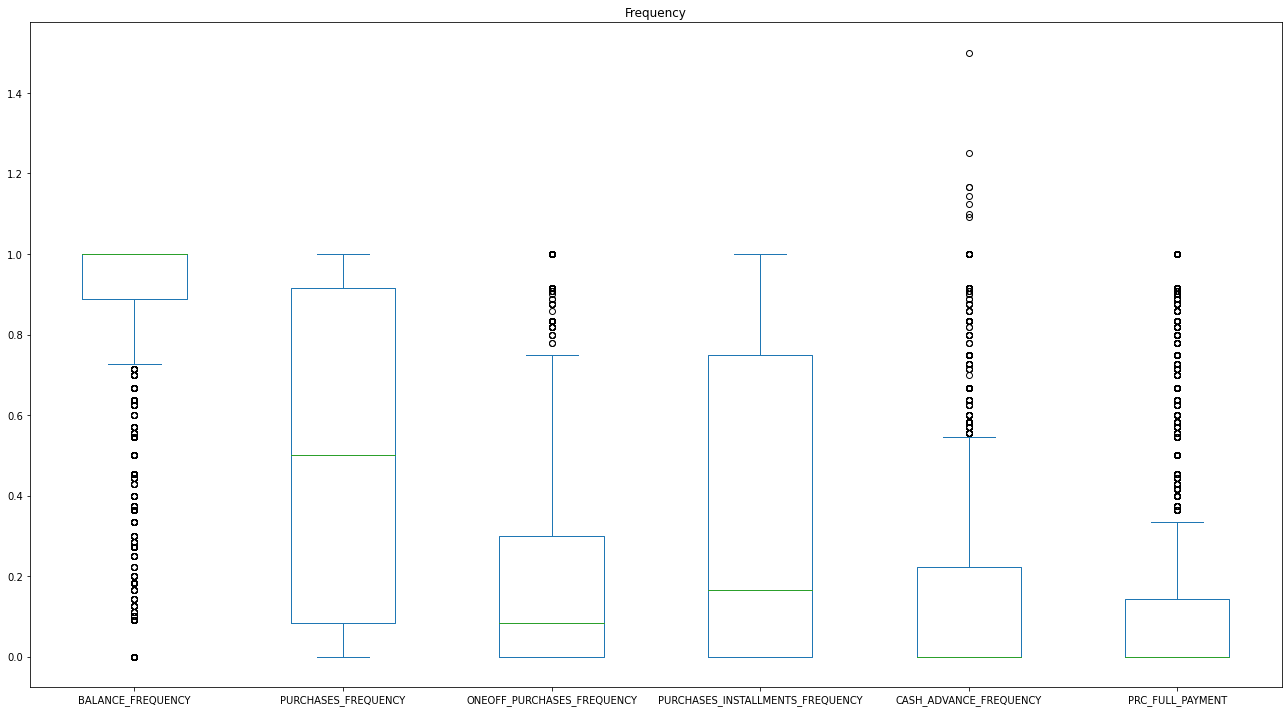

In [20]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

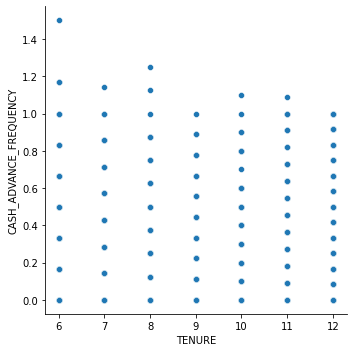

In [21]:
sns.relplot(x='TENURE',y=('CASH_ADVANCE_FREQUENCY'),data=df)

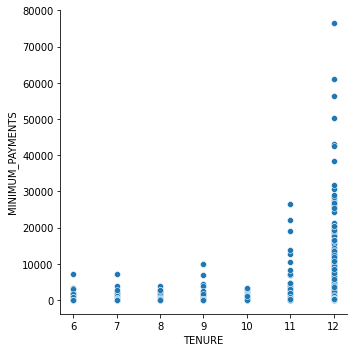

In [22]:
sns.relplot(x='TENURE',y=('MINIMUM_PAYMENTS'),data=df)

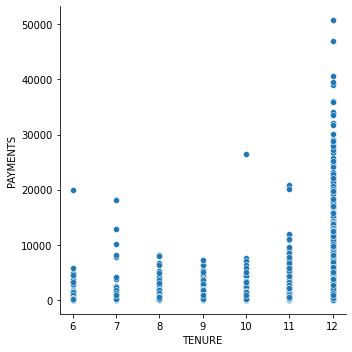

In [23]:
sns.relplot(x='TENURE',y=('PAYMENTS'),data=df)

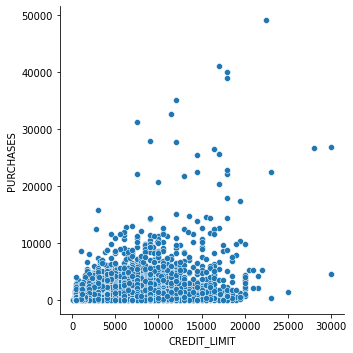

In [24]:
sns.relplot(x='CREDIT_LIMIT',y=('PURCHASES'),data=df)

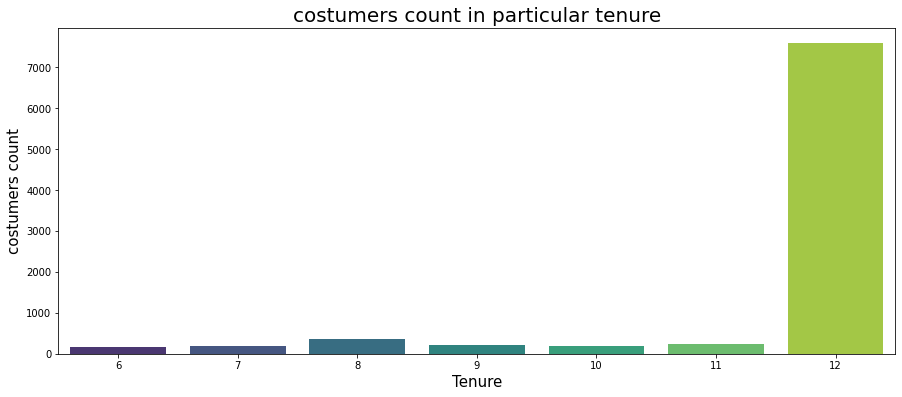

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['TENURE'].unique(),
            y=df['TENURE'].value_counts(dropna=False),
            palette="viridis")
plt.xlabel('Tenure',fontsize=15)
plt.ylabel('costumers count',fontsize=15)
plt.title('costumers count in particular tenure' , fontsize=20)
plt.show()


#### Outliers will stay as it is. i want to define clusters within data rthym itself.

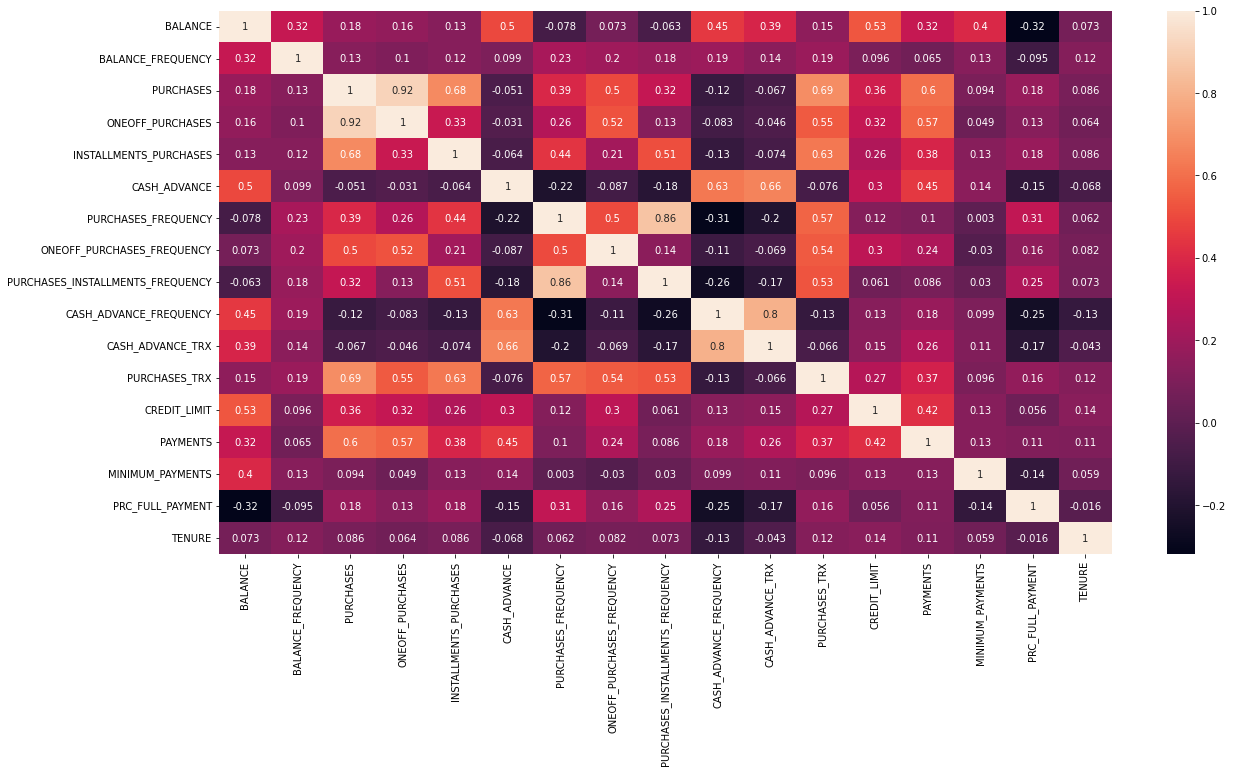

In [26]:
fig, axes = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [27]:
# Top 10 pair of variables with the highest correlation
corr = data.corr()
c1 = corr.abs().unstack()
c1 = c1.sort_values(ascending = False)
c1 = pd.DataFrame(c1)
c1.reset_index(inplace=True)
c1.columns = ['V1', 'V2', 'Abs Corr']
c1 = c1[~(c1['V1']==c1['V2'])]
c1.drop_duplicates(subset='Abs Corr', inplace=True)
c1.head(10)

,V1,V2,Abs Corr
17,PURCHASES,ONEOFF_PURCHASES,0.916845
19,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,0.862934
21,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,0.799561
23,PURCHASES_TRX,PURCHASES,0.689561
25,PURCHASES,INSTALLMENTS_PURCHASES,0.679896
27,CASH_ADVANCE_TRX,CASH_ADVANCE,0.656498
29,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.628522
31,PURCHASES_TRX,INSTALLMENTS_PURCHASES,0.628108
33,PAYMENTS,PURCHASES,0.603264
35,PURCHASES_TRX,PURCHASES_FREQUENCY,0.568430


From the displayed information above we see:

#### Component by component plot

In [28]:
# Less discrete variables
cont_cols=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
   'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

Text(0.5, 1.08, 'Component by component plot')

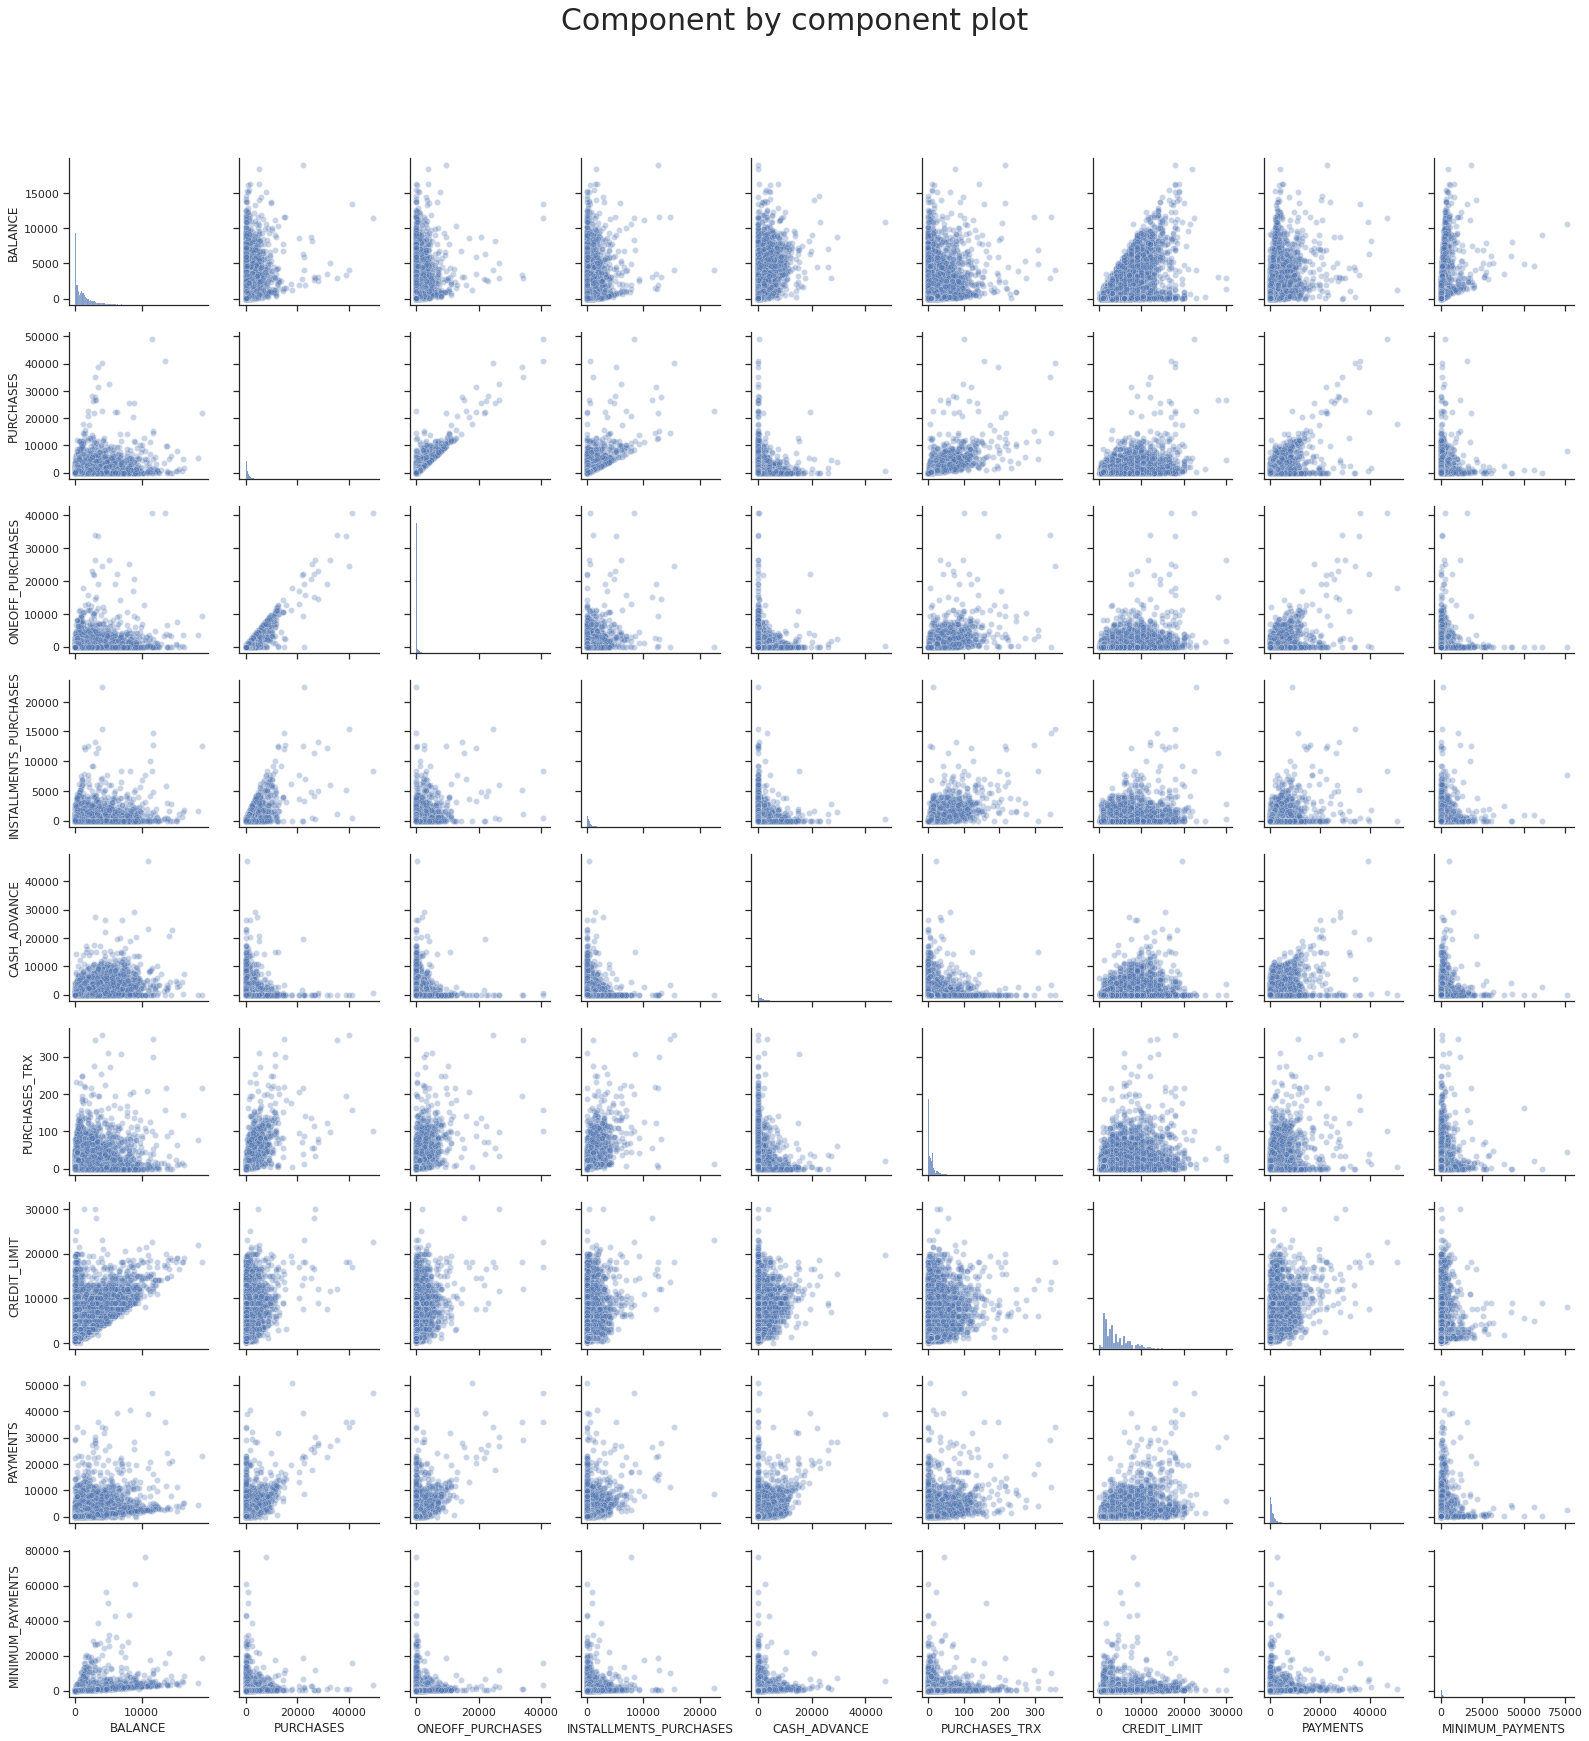

In [29]:
# Component by component plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[cont_cols],  plot_kws={'alpha':0.3})
g.fig.suptitle("Component by component plot", fontsize=30, y=1.08)

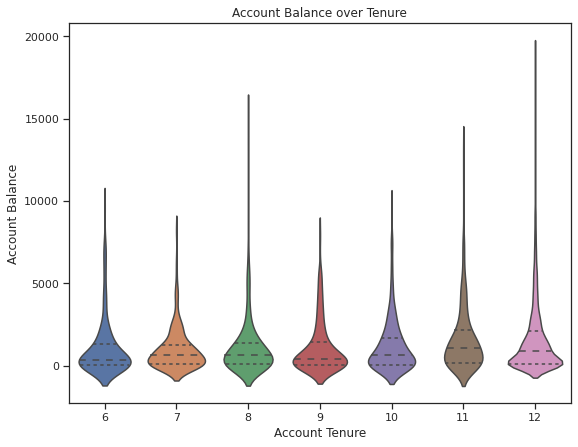

In [30]:
plt.figure(figsize=(9,7))
ax = plt.axes() 
sns.violinplot(x='TENURE', y='BALANCE', data=df, inner='quartile')
plt.xlabel('Account Tenure')
plt.ylabel('Account Balance')
plt.title('Account Balance over Tenure')
plt.show()

In [31]:
cont_cols=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
   'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

Text(0, 0.5, 'PURCHASES')

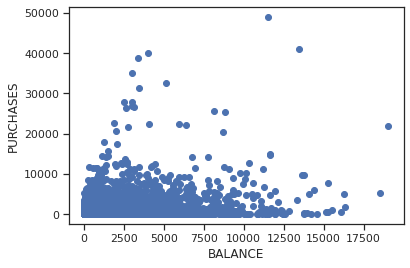

In [32]:
plt.scatter(data["BALANCE"], data["PURCHASES"])
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")


Text(0, 0.5, 'ONEOFF_PURCHASES')

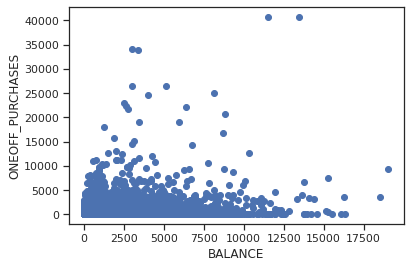

In [33]:
plt.scatter(data["BALANCE"], data["ONEOFF_PURCHASES"])
plt.xlabel("BALANCE")
plt.ylabel("ONEOFF_PURCHASES")

Text(0, 0.5, 'INSTALLMENTS_PURCHASES')

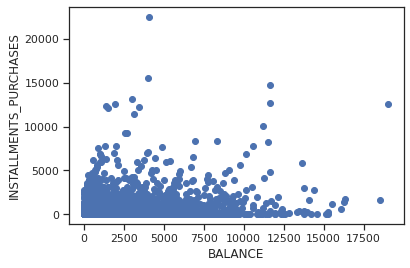

In [34]:
plt.scatter(data["BALANCE"], data["INSTALLMENTS_PURCHASES"])
plt.xlabel("BALANCE")
plt.ylabel("INSTALLMENTS_PURCHASES")

Text(0, 0.5, 'CASH_ADVANCE')

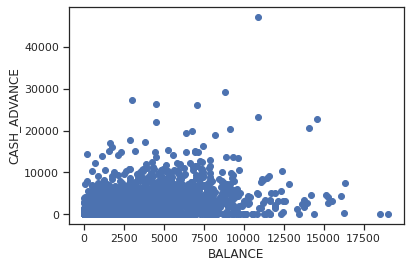

In [35]:
plt.scatter(data["BALANCE"], data["CASH_ADVANCE"])
plt.xlabel("BALANCE")
plt.ylabel("CASH_ADVANCE")

Text(0, 0.5, 'PURCHASES_TRX')

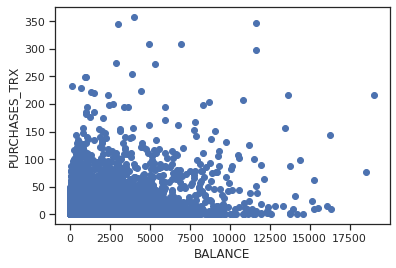

In [36]:
plt.scatter(data["BALANCE"], data["PURCHASES_TRX"])
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES_TRX")

Text(0, 0.5, 'CREDIT_LIMIT')

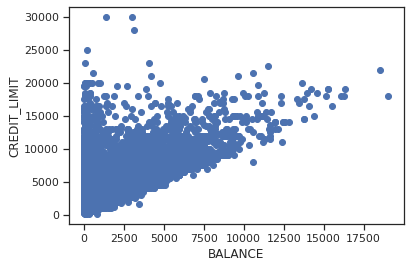

In [37]:
plt.scatter(data["BALANCE"], data["CREDIT_LIMIT"])
plt.xlabel("BALANCE")
plt.ylabel("CREDIT_LIMIT")

Text(0, 0.5, 'PURCHASES')

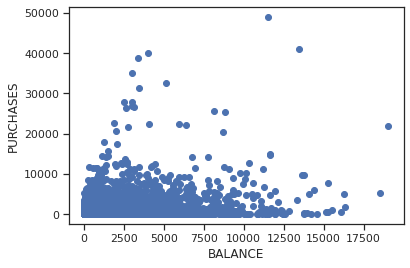

In [38]:
plt.scatter(data["BALANCE"], data["PURCHASES"])
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")

Text(0, 0.5, 'PAYMENTS')

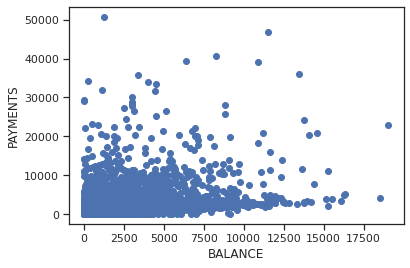

In [39]:
plt.scatter(data["BALANCE"], data["PAYMENTS"])
plt.xlabel("BALANCE")
plt.ylabel("PAYMENTS")

Text(0, 0.5, 'MINIMUM_PAYMENTS')

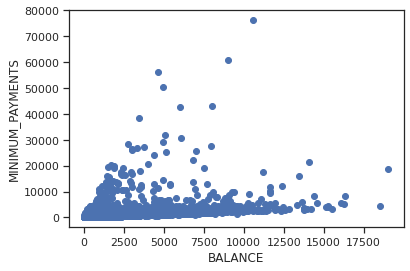

In [40]:
plt.scatter(data["BALANCE"], data["MINIMUM_PAYMENTS"])
plt.xlabel("BALANCE")
plt.ylabel("MINIMUM_PAYMENTS")

## Missing value

##### I chose to drop the NaN values , and the proportion of missing values is so small .

In [41]:

df.dropna(axis='index', inplace=True)

In [42]:
kmeans_set={"init":"random" , "n_init":10 , "max_iter":300,"random_state":42}

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(df)

In [44]:
from sklearn.cluster import KMeans
List=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k , **kmeans_set) ## ** opens dictionary
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

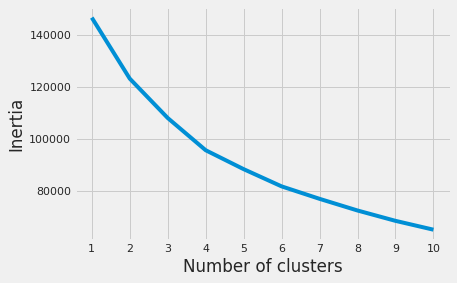

In [45]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [46]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11), List,curve="convex",direction="decreasing")
k1.elbow

4

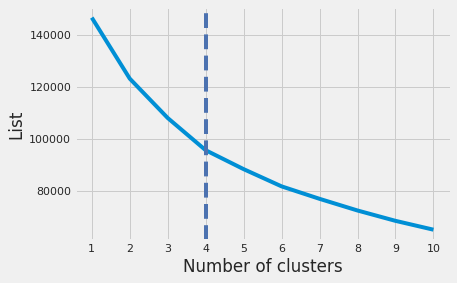

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("List")
plt.axvline(x=k1.elbow,color='b',label='axvline-full height',ls='--')
plt.show()

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3).fit(df)
centroids=kmeans.cluster_centers_
print(centroids)



[[8.81813018e+02 8.76506244e-01 6.24107871e+02 3.23688392e+02
  3.00728449e+02 5.01148753e+02 4.74836149e-01 1.58644349e-01
  3.57384973e-01 1.08525493e-01 2.29586174e+00 1.10385286e+01
  2.77662495e+03 1.03863053e+03 5.72849269e+02 1.64627492e-01
  1.14579039e+01]
 [4.83073379e+03 9.16967664e-01 1.09117699e+04 7.69262336e+03
  3.21931844e+03 5.17149377e+03 7.59576219e-01 6.04345945e-01
  6.13561977e-01 2.25522508e-01 9.25000000e+00 8.74765625e+01
  1.24886719e+04 1.80863983e+04 2.49055499e+03 3.39700266e-01
  1.18359375e+01]
 [3.47489757e+03 9.46854374e-01 1.60049616e+03 9.98532640e+02
  6.02288805e+02 2.16401792e+03 5.41316972e-01 3.18174327e-01
  3.87355542e-01 2.15816785e-01 5.88596093e+00 2.22671513e+01
  9.06045186e+03 2.97367159e+03 1.60490055e+03 1.33556964e-01
  1.17360291e+01]]


In [50]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(scaled_features)

KMeans(n_clusters=4, random_state=3)

In [51]:
data_kmeans = df.copy()

In [52]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range (2,11):
    kmeans=KMeans(n_clusters=k , **kmeans_set)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

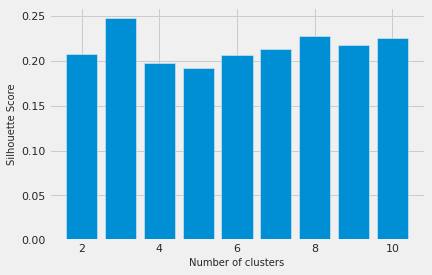

In [53]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(scaled_features, KMeans(n_clusters = n_cluster).fit_predict(scaled_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [54]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range (2,11):
    kmeans=KMeans(n_clusters=k , **kmeans_set)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

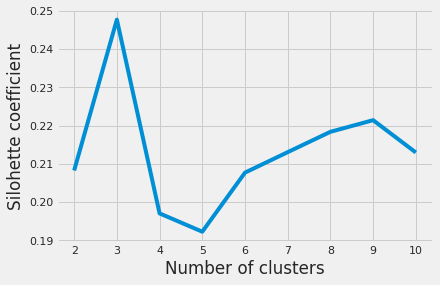

In [55]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silohette coefficient")
plt.show()

### calinski_harabasz_score

In [56]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score_coefficients=[]
for k in range (2,11):
    kmeans=KMeans(n_clusters=k , **kmeans_set)
    kmeans.fit(scaled_features)
    score=calinski_harabasz_score(scaled_features,kmeans.labels_)
    calinski_harabasz_score_coefficients.append(score)

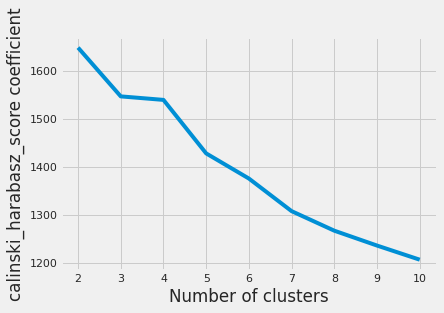

In [75]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),calinski_harabasz_score_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("calinski_harabasz_score coefficient")
plt.show()

 ***DBSCAN***

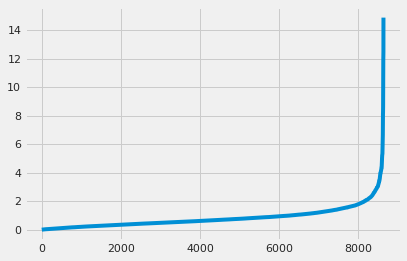

In [58]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Until around 8000th variable eps is under 2. density is too much in the general data set Here we can also see

In [59]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(scaled_features)
        sil_score = metrics.silhouette_score(scaled_features, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [60]:
df_dbscan.sort_values('sil_score', ascending=False).head()

,eps,min_samples,sil_score,number_of_clusters
85,1.9,5,0.458794,2
86,1.9,6,0.453356,2
87,1.9,7,0.446810,2
88,1.9,8,0.442998,2
89,1.9,9,0.438495,2


In [61]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(scaled_features)
        sil_score = metrics.silhouette_score(scaled_features, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [62]:
df_dbscan.sort_values('sil_score', ascending=False).tail()

,eps,min_samples,sil_score,number_of_clusters
30,1.3,1,-0.396578,1507
7,0.3,9,-0.396772,14
6,0.3,5,-0.418715,39
16,0.7,5,-0.437701,26
11,0.5,5,-0.465118,37


Even though, checking the silhouette score to choose the best DBSCAN metric does not give the best model for our data set. This method seems not a suitable one for our desired model even with a high silhouette score. The reason behind this is that we have a high number of variables in the same cluster itself but distribution of variables does not distributes homogenous in all clusters.

# ** Gaussian mixture model**

In [63]:
siliuette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(scaled_features)
        sil_score = metrics.silhouette_score(scaled_features, gmm, metric='euclidean')
        siliuette_list_GMM.append((cluster, sil_score, covariance_type, len(set(gmm)) ) )
        
df_gmm = pd.DataFrame(siliuette_list_GMM, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [64]:
df_gmm.sort_values('sil_score', ascending=False).tail()

,cluster,sil_score,covariance_type,number_of_clusters
14,8,-0.013420,diag,8
22,12,-0.018808,diag,12
30,16,-0.019406,diag,16
26,14,-0.021855,diag,14
38,20,-0.064867,diag,20


## Silhouette scores are very low.

### Result

#### I selected to choose 4 clusters from KMeans based on elbow method
I noticed some groups had very differing values for cash advance usage, which is linked to credit card usage frequency. I used this in naming the clusters.

In [65]:
data_kmeans = df.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

In [66]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
0,4545.097193,0.976723,373.776925,245.396111,128.482995,3535.521928,0.246804,0.119711,0.149047,0.448513,11.899497,5.689447,7381.863865,2424.368388,1601.704551,0.023206,11.677387
1,3103.409766,0.989537,5412.438219,3482.558256,1930.993135,565.022761,0.955504,0.725028,0.793776,0.077610,1.844156,75.779221,8737.476809,5021.099475,1333.766826,0.219866,11.948052
2,133.336796,0.410877,348.094394,212.720081,135.674111,336.573020,0.258189,0.075631,0.175348,0.035347,0.777778,4.281818,3874.913580,1274.315471,161.482800,0.239965,11.806061
3,5298.429447,0.951779,1034.647898,645.557134,389.090764,10256.019890,0.395312,0.202517,0.286910,0.644641,29.477707,13.783439,9423.885350,10849.686752,2106.244930,0.104098,11.560510
4,929.828971,0.830300,414.243552,267.268724,147.492069,1163.950999,0.425823,0.126519,0.280698,0.206734,3.343103,5.365517,2455.206897,641.876783,359.492035,0.151303,7.263793
5,4076.248041,0.987315,885.787674,122.381628,763.406047,906.759850,0.493657,0.037526,0.464059,0.084919,2.720930,18.279070,4282.558140,1367.099525,25663.304919,0.000000,11.906977
6,1360.172336,0.973784,248.073823,204.518745,43.762749,596.272338,0.149279,0.090351,0.058089,0.133567,2.471674,2.725136,3077.010771,935.519471,668.677591,0.023147,11.891733
7,130.440310,0.921326,1328.050325,614.604339,713.545740,38.415098,0.873685,0.317588,0.672354,0.006541,0.122197,21.135650,5016.961374,1421.702514,185.449986,0.790422,11.778027
8,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [67]:
data_transf_kmeans.rename({0:'Middle Ground', 1:'High Credit Frequent Purchasers', 2:'High Cash Advance Users', 
                           3:'Frugal Credit Users'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
Middle Ground,4545.097193,0.976723,373.776925,245.396111,128.482995,3535.521928,0.246804,0.119711,0.149047,0.448513,11.899497,5.689447,7381.863865,2424.368388,1601.704551,0.023206,11.677387
High Credit Frequent Purchasers,3103.409766,0.989537,5412.438219,3482.558256,1930.993135,565.022761,0.955504,0.725028,0.793776,0.077610,1.844156,75.779221,8737.476809,5021.099475,1333.766826,0.219866,11.948052
High Cash Advance Users,133.336796,0.410877,348.094394,212.720081,135.674111,336.573020,0.258189,0.075631,0.175348,0.035347,0.777778,4.281818,3874.913580,1274.315471,161.482800,0.239965,11.806061
Frugal Credit Users,5298.429447,0.951779,1034.647898,645.557134,389.090764,10256.019890,0.395312,0.202517,0.286910,0.644641,29.477707,13.783439,9423.885350,10849.686752,2106.244930,0.104098,11.560510
4,929.828971,0.830300,414.243552,267.268724,147.492069,1163.950999,0.425823,0.126519,0.280698,0.206734,3.343103,5.365517,2455.206897,641.876783,359.492035,0.151303,7.263793
5,4076.248041,0.987315,885.787674,122.381628,763.406047,906.759850,0.493657,0.037526,0.464059,0.084919,2.720930,18.279070,4282.558140,1367.099525,25663.304919,0.000000,11.906977
6,1360.172336,0.973784,248.073823,204.518745,43.762749,596.272338,0.149279,0.090351,0.058089,0.133567,2.471674,2.725136,3077.010771,935.519471,668.677591,0.023147,11.891733
7,130.440310,0.921326,1328.050325,614.604339,713.545740,38.415098,0.873685,0.317588,0.672354,0.006541,0.122197,21.135650,5016.961374,1421.702514,185.449986,0.790422,11.778027
8,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [68]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Middle Ground', 1:'High Credit Frequent Purchasers', 
                                                           2:'High Cash Advance Users', 3:'Frugal Credit Users'})

In [69]:
data_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,6,NaN
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Middle Ground
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,9,NaN
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,6,NaN
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,9,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


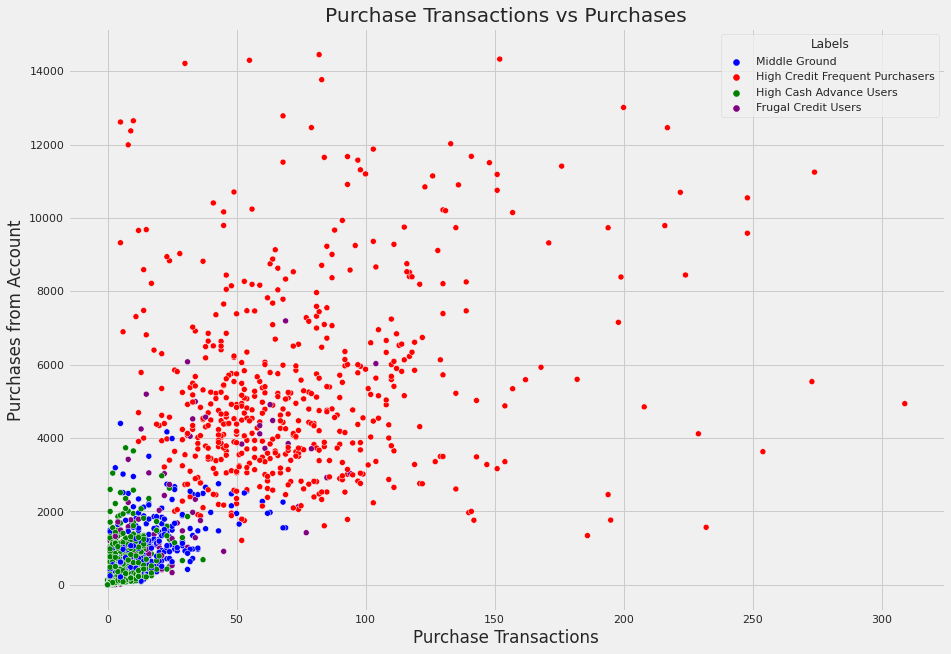

In [70]:
#now we can illustrate the groups based on a few features in a scatterplot
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_TRX']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Purchase Transactions')
g.set_ylabel('Purchases from Account')
g.set_title('Purchase Transactions vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


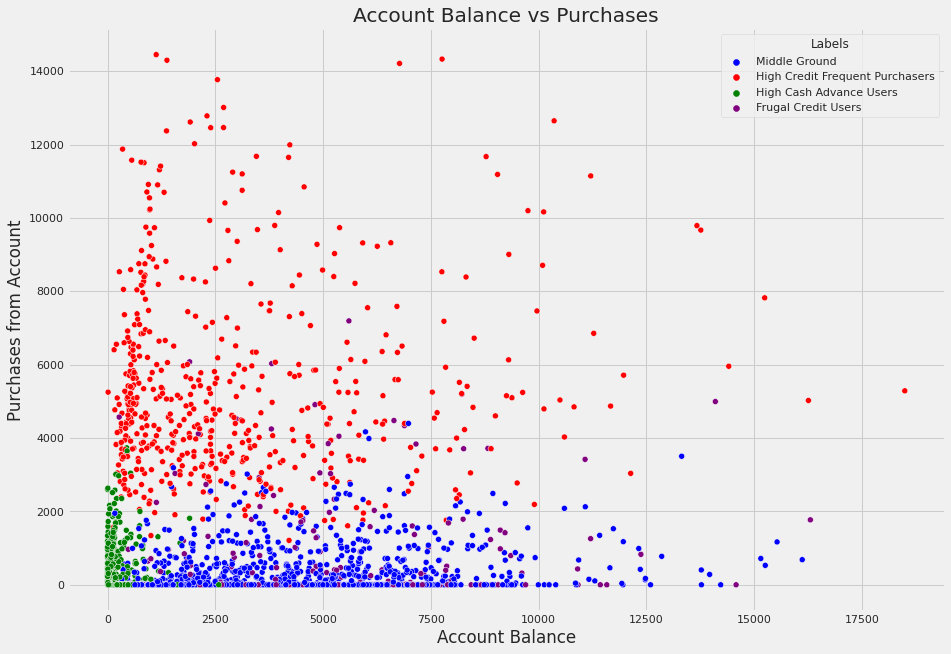

In [71]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Balance')
g.set_ylabel('Purchases from Account')
g.set_title('Account Balance vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


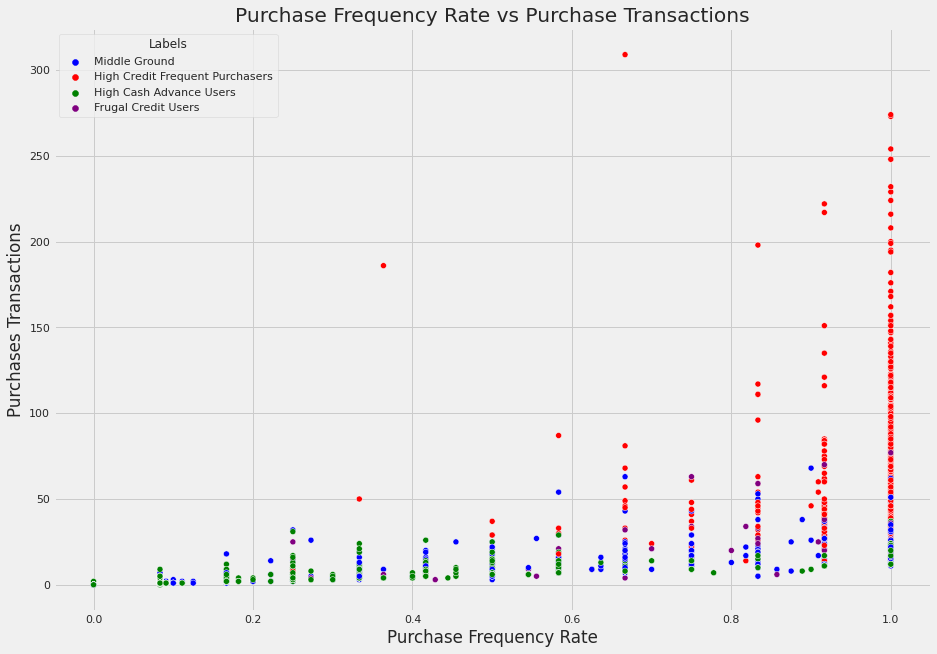

In [72]:
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_FREQUENCY']
Y = data_kmeans['PURCHASES_TRX']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Purchase Frequency Rate')
g.set_ylabel('Purchases Transactions')
g.set_title('Purchase Frequency Rate vs Purchase Transactions')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


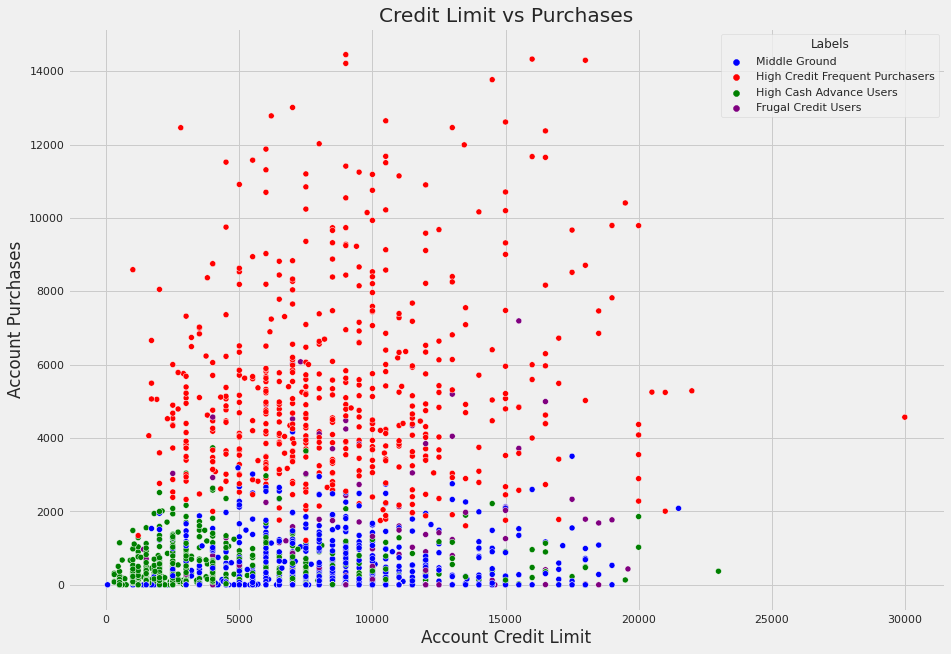

In [73]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(X, Y, hue = data_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Credit Limit')
g.set_ylabel('Account Purchases')
g.set_title('Credit Limit vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plt.show()

In [74]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]